# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [71]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [21]:
x = stats.uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.74342099 2.1848875  2.61377502 2.18641842 2.81905017 2.11887435
 2.85290635 2.53561343 2.92895125 2.95019744]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

(array([101.,  97., 111., 103.,  84.,  98.,  97.,  92., 111., 106.]),
 array([10.0026133 , 15.00178888, 20.00096447, 25.00014005, 29.99931564,
        34.99849122, 39.9976668 , 44.99684239, 49.99601797, 54.99519356,
        59.99436914]),
 <a list of 10 Patch objects>)

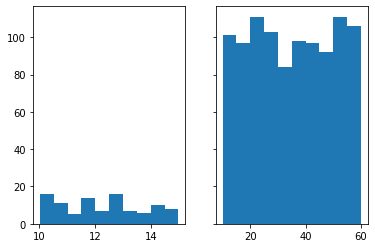

In [22]:
def generate_uniform(bottom, ceiling, count):
    x = stats.uniform.rvs(size=count)
    a = bottom
    b = ceiling
    randoms = a + (b-a)*x
    return randoms

u1 = generate_uniform(bottom=10, ceiling=15, count=100)
u2= generate_uniform(bottom=10, ceiling=60, count=1000)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(u1)
ax2.hist(u2)

How are the two distributions different?

*the distributions are both uniform but they differ in their range of values*

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

(array([ 2.,  1.,  0.,  0.,  1.,  3.,  0.,  4.,  5.,  2.,  4., 13., 10.,
        18., 15., 14., 25., 29., 34., 35., 28., 34., 42., 45., 44., 48.,
        52., 48., 46., 55., 50., 45., 41., 39., 29., 30., 12., 20., 13.,
        12., 12.,  9.,  8.,  5.,  3.,  3.,  2.,  5.,  3.,  2.]),
 array([-152.86923429, -146.7364876 , -140.60374091, -134.47099423,
        -128.33824754, -122.20550085, -116.07275416, -109.94000747,
        -103.80726078,  -97.67451409,  -91.54176741,  -85.40902072,
         -79.27627403,  -73.14352734,  -67.01078065,  -60.87803396,
         -54.74528728,  -48.61254059,  -42.4797939 ,  -36.34704721,
         -30.21430052,  -24.08155383,  -17.94880715,  -11.81606046,
          -5.68331377,    0.44943292,    6.58217961,   12.7149263 ,
          18.84767299,   24.98041967,   31.11316636,   37.24591305,
          43.37865974,   49.51140643,   55.64415312,   61.7768998 ,
          67.90964649,   74.04239318,   80.17513987,   86.30788656,
          92.44063325,   98.57337993

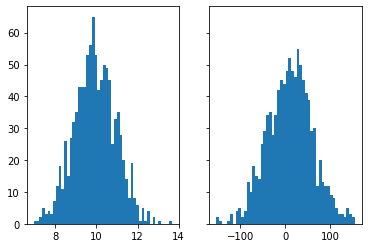

In [28]:
def generate_normal(mean, std):
    normal = stats.norm(mean, std) 
    return normal.rvs(size=1000)

n1 = generate_normal(10, 1)
n2 = generate_normal(10, 50)


# plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
ax1.hist(n1, bins=50)
ax2.hist(n2, bins=50)



How are the two distributions different?

*I think that both normal distributions differ in their range of values and how wide the bell is*
*the first one is narrowes and taller, the second one is fatter and shorter, like me*

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [31]:
vehicles = pd.read_csv('C:/Users/Zaca/Documents/Datasets/vehicles.csv')

2. CO2 Emission Grams/Mile 

(array([9.000e+00, 2.100e+01, 2.800e+01, 2.130e+02, 5.950e+02, 2.410e+03,
        4.016e+03, 7.043e+03, 6.377e+03, 5.770e+03, 2.459e+03, 2.422e+03,
        1.980e+03, 1.262e+03, 7.120e+02, 4.430e+02, 3.000e+00, 1.270e+02,
        0.000e+00, 3.600e+01, 0.000e+00, 2.100e+01, 0.000e+00, 0.000e+00,
        5.000e+00]),
 array([  37.        ,   86.30285714,  135.60571429,  184.90857143,
         234.21142857,  283.51428571,  332.81714286,  382.12      ,
         431.42285714,  480.72571429,  530.02857143,  579.33142857,
         628.63428571,  677.93714286,  727.24      ,  776.54285714,
         825.84571429,  875.14857143,  924.45142857,  973.75428571,
        1023.05714286, 1072.36      , 1121.66285714, 1170.96571429,
        1220.26857143, 1269.57142857]),
 <a list of 25 Patch objects>)

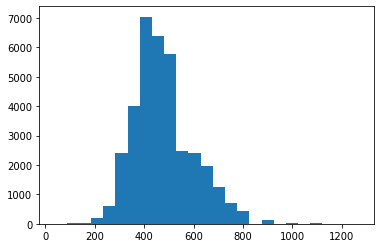

In [34]:
plt.hist(vehicles['CO2 Emission Grams/Mile'], bins= 25)

3. Combined MPG

(array([2.600e+01, 1.710e+02, 1.182e+03, 3.202e+03, 4.556e+03, 5.979e+03,
        6.375e+03, 5.405e+03, 3.340e+03, 2.345e+03, 1.331e+03, 8.240e+02,
        4.300e+02, 3.380e+02, 1.290e+02, 8.400e+01, 8.800e+01, 7.500e+01,
        1.200e+01, 1.600e+01, 1.800e+01, 1.500e+01, 5.000e+00, 4.000e+00,
        2.000e+00]),
 array([ 7.  ,  8.96, 10.92, 12.88, 14.84, 16.8 , 18.76, 20.72, 22.68,
        24.64, 26.6 , 28.56, 30.52, 32.48, 34.44, 36.4 , 38.36, 40.32,
        42.28, 44.24, 46.2 , 48.16, 50.12, 52.08, 54.04, 56.  ]),
 <a list of 25 Patch objects>)

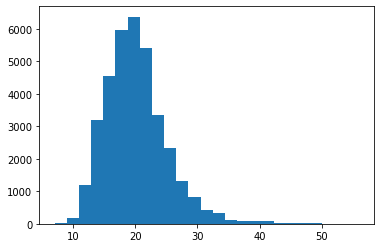

In [35]:
plt.hist(vehicles['Combined MPG'], bins= 25)

Which one(s) of the variables are nearly normally distributed? How do you know?

*I can't know for sure until we perfom a test for normality, but Combined MPG has more of a gaussian shape than CO2 emissions*

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

(array([69., 52., 41., 62., 61., 47., 41., 38., 41., 37., 35., 22., 27.,
        27., 28., 22., 22., 25., 17., 15., 16., 17., 16., 13., 13., 19.,
         7.,  8., 14.,  7., 10.,  6.,  8.,  4.,  9.,  8.,  8.,  2.,  4.,
         6.,  6.,  4.,  2.,  6.,  4.,  4.,  0.,  3.,  3.,  3.,  1.,  1.,
         3.,  4.,  1.,  1.,  0.,  1.,  1.,  1.,  2.,  2.,  3.,  2.,  2.,
         3.,  3.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.30712001e-02, 6.69617072e+00, 1.33492702e+01, 2.00023698e+01,
        2.66554693e+01, 3.33085688e+01, 3.99616683e+01, 4.66147678e+01,
        5.32678674e+01, 5.99209669e+01, 6.65740664e+01, 7.32271659e+01,
        7.98802654e+01, 8.65333650e+01, 9.31864645e+01, 9.98395640e+01,
        1.06492664e+02, 1.13145763e+02, 1.19798863e+02, 1.26451962e+02,
        1.33105062e+02, 1.39758161e+02, 1.46411261e+02, 1.53064360e+02,
  

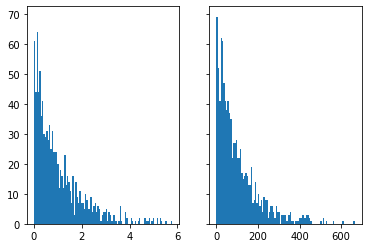

In [41]:
def generate_exp(mean):
    return np.random.exponential(mean, 1000)

e1 = generate_exp(1)
e2 = generate_exp(100)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
ax1.hist(e1, bins=100)
ax2.hist(e2, bins=100)

How are the two distributions different?

(array([69., 61., 57., 38., 49., 46., 49., 43., 39., 34., 29., 21., 33.,
        31., 29., 26., 28., 17., 22., 20., 16., 18., 18., 15., 14., 10.,
         7.,  8.,  9.,  8.,  6., 11.,  5.,  9.,  7.,  7.,  5.,  8.,  2.,
         4.,  2.,  3.,  3.,  5.,  7.,  2.,  5.,  4.,  5.,  1.,  3.,  0.,
         3.,  2.,  1.,  3.,  1.,  2.,  1.,  1.,  0.,  2.,  2.,  1.,  0.,
         0.,  2.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([1.79257522e-01, 6.71486063e+00, 1.32504637e+01, 1.97860669e+01,
        2.63216700e+01, 3.28572731e+01, 3.93928762e+01, 4.59284793e+01,
        5.24640824e+01, 5.89996855e+01, 6.55352886e+01, 7.20708917e+01,
        7.86064948e+01, 8.51420980e+01, 9.16777011e+01, 9.82133042e+01,
        1.04748907e+02, 1.11284510e+02, 1.17820114e+02, 1.24355717e+02,
        1.30891320e+02, 1.37426923e+02, 1.43962526e+02, 1.50498129e+02,
  

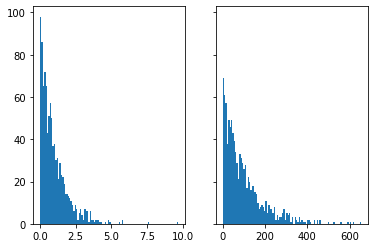

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [77]:
# I was trying first to use the model? by just feeding it the parameter but I don't quite understand how it works.
lamb = 1/10
exp = stats.expon(scale=10)
print(exp.cdf(15))  

0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [78]:
1 - exp.cdf(15)

0.2231301601484298

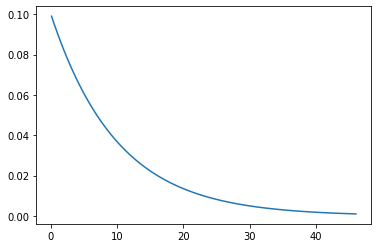

In [79]:
x = np.linspace(exp.ppf(0.01), exp.ppf(0.99), 100)
y = exp.pdf(x)
plt.plot(x, y)